In [1]:
library('tidyverse','reshape')

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


# Homework 1
## problem 1
The accompanying summary data on CeO<sub>2</sub> particle sizes (nm) 
under certain experimental conditions was read from a graph in an article.

In [2]:
n_particles <- c(6,16,28,34,23,13,8,3,3,2)
lower_bound  <- c(3,3.5,4,4.5,5,5.5,6,6.5,7,7.5)
upper_bound  <- c(3.5,4,4.5,5,5.5,6,6.5,7,7.5,8)
particle_data <- data.frame(lower_bound,upper_bound,n_particles)
particle_data

lower_bound,upper_bound,n_particles
3.0,3.5,6
3.5,4.0,16
4.0,4.5,28
4.5,5.0,34
5.0,5.5,23
5.5,6.0,13
6.0,6.5,8
6.5,7.0,3
7.0,7.5,3
7.5,8.0,2


(a)
What proportion of the observations are less than 5? 
(Round your answer to three decimal places.)

0.618 is correct.

In [3]:
total_particles <- sum(particle_data['n_particles'])

bool_less_than_5 <- particle_data$upper_bound<=5 #boolean cover
vect_less_than_5 <- particle_data[bool_less_than_5,'n_particles']
n_less_than_5 <- sum(vect_less_than_5)

cat(n_less_than_5, '/', total_particles)

answer <- n_less_than_5/total_particles
round(answer,3)

84 / 136

[1] 0.618

(b) What proportion of the observations are at least 6? 
(Round your answer to three decimal places.)

0.118 is correct.

In [4]:
bool_at_least_6 <- particle_data$lower_bound>=6 #boolean cover
vect_at_least_6 <- particle_data[bool_at_least_6,'n_particles']
n_at_least_6  <- sum(vect_at_least_6)

cat(n_at_least_6,'/',total_particles)
answer <- n_at_least_6/total_particles
round(answer,3)

16 / 136

[1] 0.118

(c)
Construct a histogram with relative frequency on the vertical axis.
Comment on interesting features. In particular, does the distribution of particle sizes appear to be reasonably symmetric or somewhat skewed? 

[Note: The investigators fit a lognormal distribution to the data.]
positively skewed is correct.

In [5]:
weighted_size <- lower_bound*n_particles
size_mean=sum(weighted_size)/total_particles
size_median=4.5

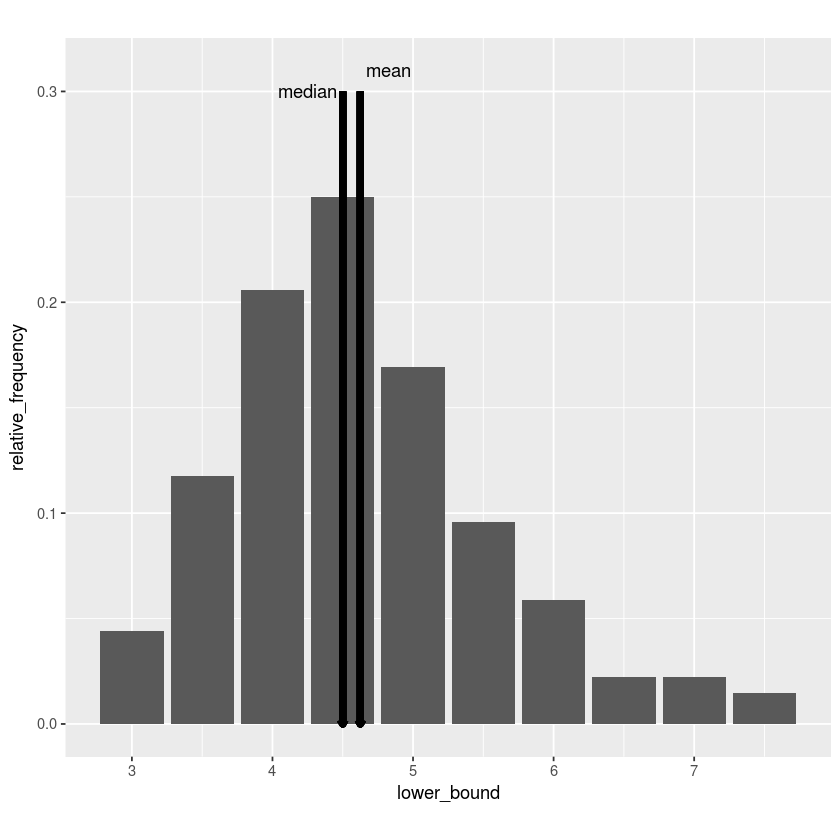

In [6]:
relative_frequency=n_particles/total_particles
ggplot(particle_data, aes(y = relative_frequency,x = lower_bound)) +
  geom_col() +
  
  geom_segment(aes(x=size_mean, xend=size_mean, y=0.3, yend=0)
               , size = 2
               , arrow = arrow(length = unit(0.1, "cm"))) +
  annotate("text",x=size_mean+0.2,y=0.31,label="mean") +
  
  geom_segment(aes(x=size_median, xend=size_median, y=0.3, yend=0)
               , size = 2
               , arrow = arrow(length = unit(0.1, "cm"))) +
  annotate("text",x=size_median-0.25,y=0.3,label="median") +
  coord_fixed(ratio=15)

#mean>median = positive skew
#mean<median = negative skew
#mean=median = symmetric

(d)
Construct a histogram with density on the vertical axis.

Compare the density histogram to the histogram in part (c).

Both graphs are essentially identical, other than vertical axis labeling is correct.

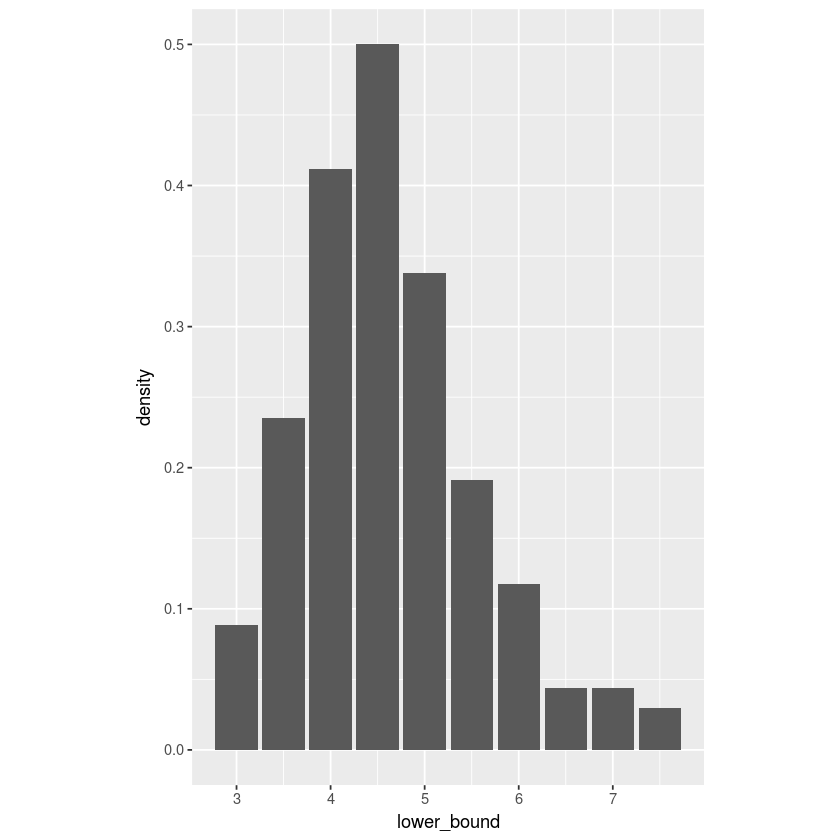

In [7]:
bin_width=upper_bound-lower_bound
density=relative_frequency/bin_width

ggplot(particle_data, aes(y = density,x = lower_bound)) +
  geom_col() +
  
  coord_fixed(ratio=15)

## Problem 2
Exposure to microbial products, especially endotoxin, may have an impact on vulnerability to allergic diseases. The following are data on concentration (EU/mg) in settled dust for one sample of urban homes and another of farm homes. 

In [8]:
urban <- c(6.0,5.0,11.0,33.0,4.0,5.0,80.0,18.0,35.0,17.0,23.0)
farm <- c(6.0,15.0,11.0,9.0,9.0,8.0,2.0,19.0,3.0,9.0,22.0,9.2,4.0,1.0,0.4)

(a) Determine the sample mean for each sample. (Round your answers to two decimal places.) 

21.55
and
8.51
is correct

In [9]:
round(mean(urban),2)
round(mean(farm),2)

[1] 21.55

[1] 8.51


How do they compare? 

The average endotoxin concentration in urban homes is more than double the average concentration in farm homes.    

(b) Determine the sample median for each sample. 
  
17 
and
9 
is correct
    

In [10]:
median(urban)
median(farm)

[1] 17

[1] 9

How do they compare? 

The median endotoxin concentration in urban homes is roughly double the median concentration in farm homes.

Why is the median for the urban sample so different from the mean for that sample? 

The mean and median for urban homes are so different because the few large values raise the mean but not the median.

(c) Calculate the trimmed mean for each sample by deleting the smallest and largest observation. (Round your answers to two decimal places.) 

17
and
8.09 
is correct

In [11]:
round(mean(urban,trim = 1/length(urban)),2)
round(mean(farm,trim=1/length(farm)),2)

[1] 17

[1] 8.09

What are the corresponding trimming percentages? (Round your answers to two decimal places.) 

9.09
and
6.67 
is correct

In [12]:
round(100*(1/length(urban)),2)
round(100*(1/length(farm)),2)

[1] 9.09

[1] 6.67

How do the values of these trimmed means compare to the corresponding means and medians?


Urban homes:
The trimmed mean **less than** the mean of the entire sample. The trimmed mean **equal to** the median of the entire sample.

Farm homes:
The trimmmed mean is **less than** the mean of the entire sample. The trimmed mean is **less than** the median of the entire sample.

## Problem 3
The article "Snow Cover and Temperature Relationships in North America and Eurasia" used statistical techniques to relate the amount of snow cover on each continent to average continental temperature. Data presented there included the following ten observations on October snow cover for Eurasia during the years 1970-1979 (in million km<sup>2</sup>): 

In [13]:
october_snow_cover <- c(6.5, 12.0, 14.9, 10.0, 10.7, 7.9, 21.9, 12.5, 14.5, 9.2)
years  <- c(1970:1979)
snow_data=data.frame(years,october_snow_cover)
snow_data

years,october_snow_cover
1970,6.5
1971,12.0
1972,14.9
1973,10.0
1974,10.7
1975,7.9
1976,21.9
1977,12.5
1978,14.5
1979,9.2


What would you report as a representative, or typical, value of October snow cover for this period, and what prompted your choice? 

The median of this sample because a potential outlier may produce a misleading mean. 

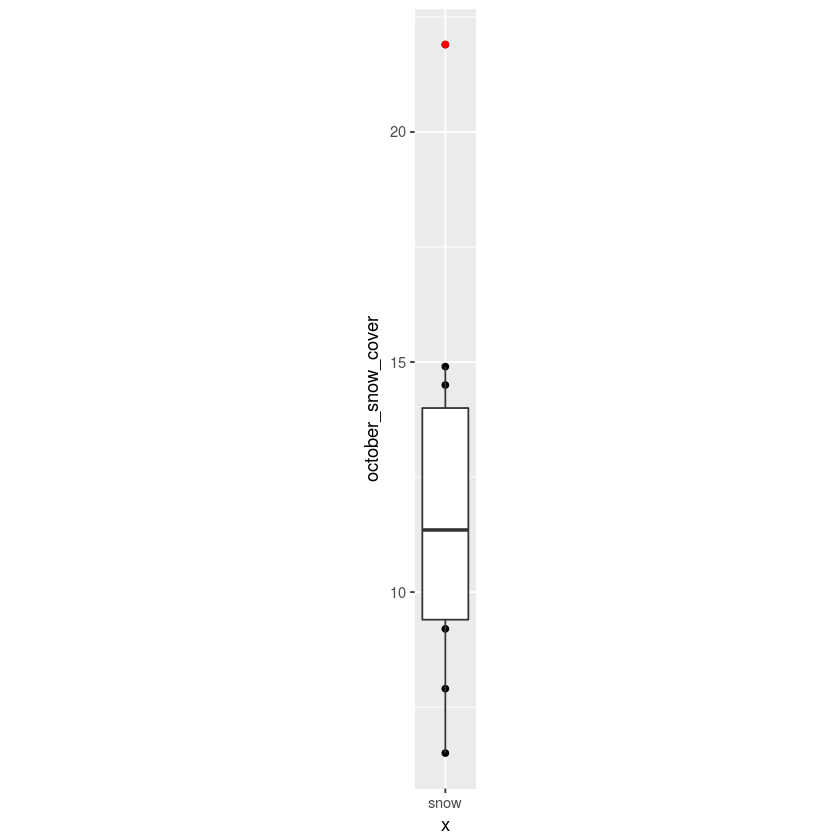

In [14]:
is_outlier <- function(x) {
  return(x < quantile(x, 0.25) - 1.5 * IQR(x) | x > quantile(x, 0.75) + 1.5 * IQR(x))
}
snow_outliers=is_outlier(october_snow_cover)#boolean cover

snow_mean=mean(october_snow_cover)
snow_median=median(october_snow_cover)

snow_Q1=quantile(october_snow_cover, 0.25)
snow_Q3=quantile(october_snow_cover, 0.75)
snow_IQR=snow_Q3-snow_Q1
snow_USL=snow_Q3 + 1.5 * snow_IQR
snow_LSL=snow_Q1 - 1.5 * snow_IQR


ggplot(snow_data,aes(x='snow',y=october_snow_cover)) +
  geom_point()+
  geom_boxplot(outlier.color = 'red') +
  coord_fixed(0.75)

## Problem 4

The propagation of fatigue cracks in various aircraft parts has been the subject of extensive study in recent years. The accompanying data consists of propagation lives (flight hours/104) to reach a given crack size in fastener holes intended for use in military aircraft. 

In [15]:
crack_time <- c(0.721, 0.844, 0.870, 0.915, 0.929, 0.933, 0.968, 1.009
,1.039, 1.048, 1.084, 1.125, 1.130, 1.169, 1.239, 1.360   )

(a) Compute and compare the values of the sample mean x and median x tilde. (Round your answers to four decimal places.) 

$\bar{x}=1.0239$
and
$\tilde{x}=1.0240$
is correct

In [16]:
round(mean(crack_time),4)
round(median(crack_time),4)

[1] 1.0239

[1] 1.024

b) By how much could the largest sample observation be decreased without affecting the value of the median? (Enter your answer to three decimal places.)

0.321 is correct

In [17]:
half_length <- length(crack_time)/2

values_used_by_median <- c(sort(crack_time)[half_length]
                           ,sort(crack_time)[half_length+1])

cat(max(crack_time),'-',max(values_used_by_median),'=',max(crack_time)-max(values_used_by_median))


1.36 - 1.039 = 0.321

## Problem 5
A sample of n = 10 automobiles was selected, and each was subjected to a 5-mph crash test. Denoting a car with no visible damage by S (for success) and a car with such damage by F, results were as follows: 


In [18]:
damage <- c('S', 'S', 'F', 'S', 'S', 'S', 'S', 'F', 'S', 'F')

(a) What is the value of the sample proportion of successes x/n?

0.7 is correct

In [19]:
sum(damage=='S')/length(damage)

[1] 0.7

(b) Replace each S with a 1 and each F with a 0. Then calculate x for this numerically coded sample.
    
$\bar{x}=0.7$ 
is correct

In [20]:
coded_damage <- as.integer(damage=='S')
mean(coded_damage)

[1] 0.7

How does x compare with x/n?

The proportion in part (a) is exactly equal to the mean in part (b).

(c) Suppose it is decided to include 15 more cars in the experiment. How many of these would have to be S's to give x/n = 0.72 for the entire sample of 25 cars?

11 is correct

In [21]:
n1 <- length(coded_damage)
x1 <- sum(coded_damage) 
n2 <- n1+15
x2 <- 0.72*n2 # because x2/n2=0.72
x2-x1

[1] 11

## Problem 6
(a)
If a constant c is added to each x<sub>i</sub> in a sample, yielding
y<sub>i</sub> = x<sub>i</sub> + c,
how does the sample mean of the y<sub>i</sub> s relate to the mean of the x<sub>i</sub> s? 

$$\bar{y}=\frac{\sum{y_i}}{n}
= \frac{\sum{x_i+c}}{n}
= \frac{\sum{x_i}}{n} + \frac{nc}{n}
= \bar{x}+c
$$

If a constant c is added to each x<sub>i</sub> in a sample, yielding
y<sub>i</sub> = x<sub>i</sub> + c,
how does the median of the y<sub>i</sub> s relate to the median of the x<sub>i</sub> s?

$\tilde{y}=$the median of $(x_1+c,x_2+c,...,x_n+c)$

$=$ the median of $(x_1,x_2,...,x_n)+c$

$= \tilde{x} + c$

(b)
If each x<sub>i</sub> is multiplied by a constant c, yielding
y<sub>i</sub> = cx<sub>i</sub>,
how does the sample mean of the y<sub>i</sub> s relate to the mean of the x<sub>i</sub> s? 

$\bar{y}=\frac{\sum{y_i}}{n}$
$= \frac{\sum{x_i c}}{n} $
$= \frac{c\sum{x_i}}{n}$
$=\bar{x} \cdot c$

If each x<sub>i</sub> is multiplied by a constant c, yielding
y<sub>i</sub> = cx<sub>i</sub>,
how does the median of the y<sub>i</sub> s relate to the median of the x<sub>i</sub> s?

$\tilde{y}=$ the median of 
$ (x_1 \cdot c, x_2 \cdot c,, x_n \cdot c) $
$=$ the median of $(x_1,x_2,...,x_n)\cdot c$
$=\tilde{x} \cdot c$

## Problem 7
An experiment to study the lifetime (in hours) for a certain type of component involved putting ten components into operation and observing them for 100 hours. Eight of the components failed during that period, and those lifetimes were recorded. Denote the lifetimes of the two components still functioning after 100 hours by 100+. The resulting sample observations were as follows.


In [22]:
lifetime <- c('18', '30', '36', '49', '56', '80', '87', '92','100+','100+')


 Which of the measures of center discussed in this section can be calculated? [Note: The data from this experiment is said to be "censored on the right."] (Select all that apply.) 
 
 20% trimmed mean = 66.67
 and
 sample median = 68

In [23]:
lifetime
trimmed_lifetime <- as.integer(lifetime[3:8])
trimmed_lifetime
round(mean(trimmed_lifetime),2)

[1] "18"   "30"   "36"   "49"   "56"   "80"   "87"   "92"   "100+" "100+"

[1] 36 49 56 80 87 92

[1] 66.67

In [24]:
half_length_lifetime <- length(lifetime)/2
values_for_median=as.integer(c(lifetime[half_length_lifetime],
lifetime[half_length_lifetime+1]))
cat('median=median(',values_for_median,')=',median(values_for_median))

median=median( 56 80 )= 68

## Problem 8

Poly(3-hydroxybutyrate) (PHB), a semicrystalline polymer that is fully biodegradable and biocompatible, is obtained from renewable resources. From a sustainability perspective, PHB offers many attractive properties though it is more expensive to produce than standard plastics. The accompanying data on melting point (°C) for each of 12 specimens of the polymer using a differential scanning calorimeter appeared in an article. 

In [25]:
melting_point <- c(180.6, 181.8, 180.9, 181.6, 182.7, 181.5, 181.4, 182.2, 182.1, 180.3, 181.6, 180.6)

Compute the following. (Round your answers to two decimal places.)

(a)
the sample range 
2.40 is correct

In [26]:
round(max(melting_point)-min(melting_point),2)

[1] 2.4

 (b)
the sample variance s<sup>2</sup> from the definition [Hint: First subtract 180 from each observation.] 

0.53 is correct

In [27]:
round(var(melting_point),2)
#or
n <- length(melting_point)
squared_deviation <- (melting_point-mean(melting_point))^2
cat(sum(squared_deviation),'/(',n,'-1)')
sum(squared_deviation)/(n-1)

[1] 0.53

5.789167 /( 12 -1)

[1] 0.5262879

(c) the sample standard deviation

0.73 is correct

In [28]:
round(sqrt(var(melting_point)),2)

[1] 0.73

(d) s2 using the shortcut method

0.53 is correct

from the text

$s^2=\frac{S_{xx}}{n-1}$

the numerator of s<sup>2</sup> is
$S_{xx}=\sum{(x_i - \bar{x})^2}= \sum{x_i^2}-\frac{\left(\sum{x_i}\right)^2}{n}$

In [29]:
sum_of_squares <- sum(melting_point^2)
sum_squared <- sum(melting_point)^2
S_xx=sum_of_squares - (sum_squared/n)
cat('(',sum_of_squares,'- ',sum_squared,'/',n,')/(',n,'-1)')
round(S_xx/(n-1),2)

( 395058.7 -  4740635 / 12 )/( 12 -1)

[1] 0.53

## Problem 9

Suppose the value of Young's modulus (GPa) was determined for cast plates consisting of certain intermetallic substrates, resulting in the following sample observations: 

In [30]:
modulus <- c(116.8,115.8,114.8,115.3,115.9)

(a) Calculate $\bar{x}$

115.72 is correct

In [31]:
mean(modulus)
#or
sum(modulus)/length(modulus)

[1] 115.72

[1] 115.72

Calculate the deviations from the mean. (Enter your answers to two decimal places.) 

(b) Use the deviations calculated in part (a) to obtain the sample variance and the sample standard deviation. (Round your answers to three decimal places.) 

0.557 
and
0.746 
is correct

In [34]:
deviation <- round((modulus-mean(modulus)),2)
deviation_squared <- deviation^2
data.frame(modulus,deviation,deviation_squared)
sample_var <- sum(deviation_squared)/(length(modulus)-1)
sample_var
round(sqrt(sample_var),3)

modulus,deviation,deviation_squared
116.8,1.08,1.1664
115.8,0.08,0.0064
114.8,-0.92,0.8464
115.3,-0.42,0.1764
115.9,0.18,0.0324


[1] 0.557

[1] 0.746

(c) Calculate s<sup>2</sup> by using the computational formula for the numerator S<sub>xx</sub>. (Round your answer to three decimal places.)

0.557 is correct

In [35]:
n <- length(modulus)
sum_of_squares <- sum(modulus^2)
sum_squared <- sum(modulus)^2
S_xx=sum_of_squares - (sum_squared/n)
cat('(',sum_of_squares,'- ',sum_squared,'/',n,')/(',n,'-1)')
round(S_xx/(n-1),3)

( 66957.82 -  334778 / 5 )/( 5 -1)

[1] 0.557

(d) Subtract 100 from each observation to obtain a sample of transformed values. Now calculate the sample variance of these transformed values. (Round your answer to three decimal places.)

0.557 is correct

In [36]:
trans_modulus <- modulus-100
round(var(trans_modulus),3)

[1] 0.557

An article described an experiment in which observations on various characteristics were made using minichambers of three different types: (1) cooler (PVC frames covered with shade cloth), (2) control (PVC frames only), and (3) warmer (PVC frames covered with plastic). One of the article's authors kindly supplied the accompanying data on the difference between air and soil temperatures (°C). 

In [37]:
Run <- c(1:15)

Cooler <- c(1.59
,1.43
,1.88
,1.26
,1.91
,1.86
,1.9
,1.57
,1.79
,1.72
,2.41
,2.34
,0.87
,1.34
,1.76)

Control <- c(1.92
,2
,2.19
,1.12
,1.78
,1.84
,2.45
,2.03
,1.52
,0.56
,1.9,NA,NA,NA,NA)


Warmer <- c(2.57
,2.6
,1.93
,1.58
,2.3
,0.84
,2.65
,0.15
,2.74
,2.53
,2.13
,2.86
,2.31
,1.91,NA)

minichambers <- data.frame(Run,Cooler,Control,Warmer)
minichambers

Run,Cooler,Control,Warmer
1,1.59,1.92,2.57
2,1.43,2.00,2.60
3,1.88,2.19,1.93
4,1.26,1.12,1.58
5,1.91,1.78,2.30
6,1.86,1.84,0.84
7,1.90,2.45,2.65
8,1.57,2.03,0.15
9,1.79,1.52,2.74
10,1.72,0.56,2.53


 (a)
Compare measures of center for the three different samples. 

Cooler  $\tilde{x}=1.760$

Control $\tilde{x}=1.900$

Warmer  $\tilde{x}=2.305$

In [38]:
median(Cooler)
median(Control,na.rm = TRUE)
median(Warmer,na.rm = TRUE)

[1] 1.76

[1] 1.9

[1] 2.305

 (b)
Calculate the standard deviations for the three different samples. (Round your answers to three decimal places.) 

Cooler  $s=0.395$

Control $s=0.524$

Warmer  $s=0.772$


In [42]:
round(sd(Cooler,na.rm=TRUE),3)
round(sd(Control,na.rm = TRUE),3)
round(sd(Warmer,na.rm=TRUE),3)

[1] 0.395

[1] 0.524

[1] 0.772

Interpret and compare the standard deviations for the three different samples. 

We see from the standard deviations that variability increases as the conditions of the minichambers transition from cooler to warmer.    

Do the fourth spreads for the three samples convey the same message as do the standard deviations about relative variability? 

No, The fourth spreads do not communicate the same message as the standard deviations did.  

In [43]:
IQR(Cooler)
IQR(Control,na.rm = TRUE)
IQR(Warmer,na.rm=TRUE)

[1] 0.39

[1] 0.365

[1] 0.6775

(d) Construct a comparative boxplot. 

In [44]:
molten_minichambers <- reshape2::melt(minichambers,'Run')
colnames(molten_minichambers) <- c("Run","Type", "TempDiff")
molten_minichambers

Run,Type,TempDiff
1,Cooler,1.59
2,Cooler,1.43
3,Cooler,1.88
4,Cooler,1.26
5,Cooler,1.91
6,Cooler,1.86
7,Cooler,1.90
8,Cooler,1.57
9,Cooler,1.79
10,Cooler,1.72


Warning message:
“Removed 5 rows containing non-finite values (stat_boxplot).”

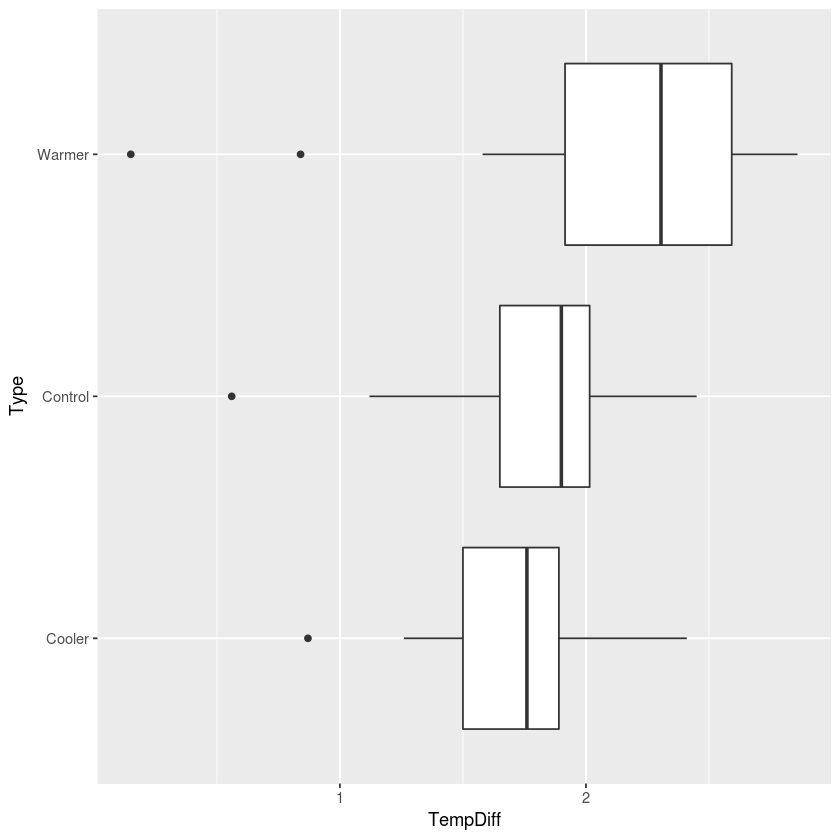

In [45]:
ggplot(molten_minichambers,aes(x = Type,y=TempDiff)) +
   geom_boxplot() + coord_flip()

## Problem 11
A study of the relationship between age and various visual functions (such as acuity and depth perception) reported the following observations on the area of scleral lamina (mm2) from human optic nerve heads: 

In [46]:
scleral_area <- c(2.82,2.67,2.80,3.88,2.38,2.67,3.97,4.25,3.83
  ,4.35,3.37,4.61,2.34,3.66,2.88,3.50,3.04)

Calculate $\sum{x_i}$ and $\sum{x_i^22}$. 
(Round to two decimal places.) 

57.02
and
199.45
is correct

In [47]:
sum(scleral_area)
sum(scleral_area^2)

[1] 57.02

[1] 199.45

(b) Use the values calculated in part (a) to compute the sample variance s2 and then the sample standard deviation s. (Round your answers to three decimal places.) 

0.512
and
0.716
is correct

In [48]:
round(var(scleral_area),3)
round(sd(scleral_area),3)

[1] 0.512

[1] 0.716

## Problem 12
An article reported the following data on oxidation-induction time (min) for various commercial oils: 

In [50]:
oxidation_time <- c(89,104,130,160,180,195,134,145,214,105,145  
  ,153,151,138,87,99,94,119,129)

(a) Calculate the sample variance and standard deviation. (Round your answers to three decimal places.)

$s^2=1269.673$

$s=35.632$

is correct

In [51]:
round(var(oxidation_time),3)
round(sd(oxidation_time),3)

[1] 1269.673

[1] 35.632

(b) If the observations were reexpressed in hours, what would be the resulting values of the sample variance and sample standard deviation? Answer without actually performing the reexpression. (Round your answer to three decimal places.) 

0.353
and
0.594
is correct

In [52]:
round(var(oxidation_time)/60^2,3)
round(sd(oxidation_time)/60,3)

[1] 0.353

[1] 0.594

## Problem 13
The first four deviations from the mean in a sample of n = 5 reaction times were 0.5, 0.8, 1.2, and 1.4. What is the fifth deviation from the mean?

In [53]:
0-sum(c(0.5,0.8,1.2,1.4)) #deviations should sum to 0

[1] -3.9

Give a sample for which these are the five deviations from the mean. 

In [54]:
sample <- c(4.4, 4.7, 5.1, 5.3, 0)
sample-mean(sample)

[1]  0.5  0.8  1.2  1.4 -3.9

## Problem 14
A company utilizes two different machines to manufacture parts of a certain type. During a single shift, a sample of n = 20 parts produced by each machine is obtained, and the value of a particular critical dimension for each part is determined. The comparative boxplot below is constructed from the resulting data. 

![image.png](attachment:image.png)

A typical value seems to be about the same for the two machines.

The only outlier that exists is from machine 1.

Machine 2's sample values have considerably more variation than machine 1's sample values.

## Problem 15
Observations on burst strength (lb/in2) were obtained both for test nozzle closure welds and for production canister nozzle welds.

In [55]:
Test <- c(7200,6100,7300,7300,8000,7400
          ,7300,7300,8000,6700,8300)
Cannister <- c(5250,5625,5900,5900,5700,6050
               ,5800,6000,5875,6100,5850,6600)

The production canister welds have consistently lower burst strengths than the test nozzle welds.

The test nozzle welds have much more variable burst strengths.

The production canister welds data contain 2 outliers.

## Problem 16
Temperature transducers of a certain type are shipped in batches of 50. A sample of 60 batches was selected, and the number of transducers in each batch not conforming to design specifications was determined, resulting in the following data: 

In [56]:
nonconforming <- c(2,1,2,4,1,1,3,2,0,5,3,3,1,3,2,4,7,0,2,3
                   ,0,4,2,1,3,1,1,3,4,1,2,3,2,2,8,4,5,1,3,1
                   ,5,0,2,3,2,1,0,6,4,2,1,6,0,3,3,3,7,1,2,2)

In [57]:
freq <- as.data.frame(table(nonconforming))
freq$nonconforming  <- as.numeric(levels(freq$nonconforming)) # factors are not numbers
freq$relative_freq <- round(freq$Freq/sum(freq$Freq),3)
freq

nonconforming,Freq,relative_freq
0,6,0.100
1,13,0.217
2,14,0.233
3,13,0.217
4,6,0.100
5,3,0.050
6,2,0.033
7,2,0.033
8,1,0.017


(b) What proportion of batches in the sample have at most six nonconforming transducers? (Round your answer to three decimal places.)

0.950 is correct

In [58]:
round(sum(freq[freq$nonconforming<=6,'Freq'])/sum(freq$Freq),3)

[1] 0.95

What proportion have fewer than six? (Round your answer to three decimal places.)

0.917 is correct

In [59]:
round(sum(freq[freq$nonconforming<6,'Freq'])/sum(freq$Freq),3)

[1] 0.917

What proportion have at least six nonconforming units? (Round your answer to three decimal places.)
 
 0.083 is correct

In [60]:
round(sum(freq[freq$nonconforming>=6,'Freq'])/sum(freq$Freq),3)

[1] 0.083

(c) Draw a histogram of the data using relative frequency on the vertical scale.

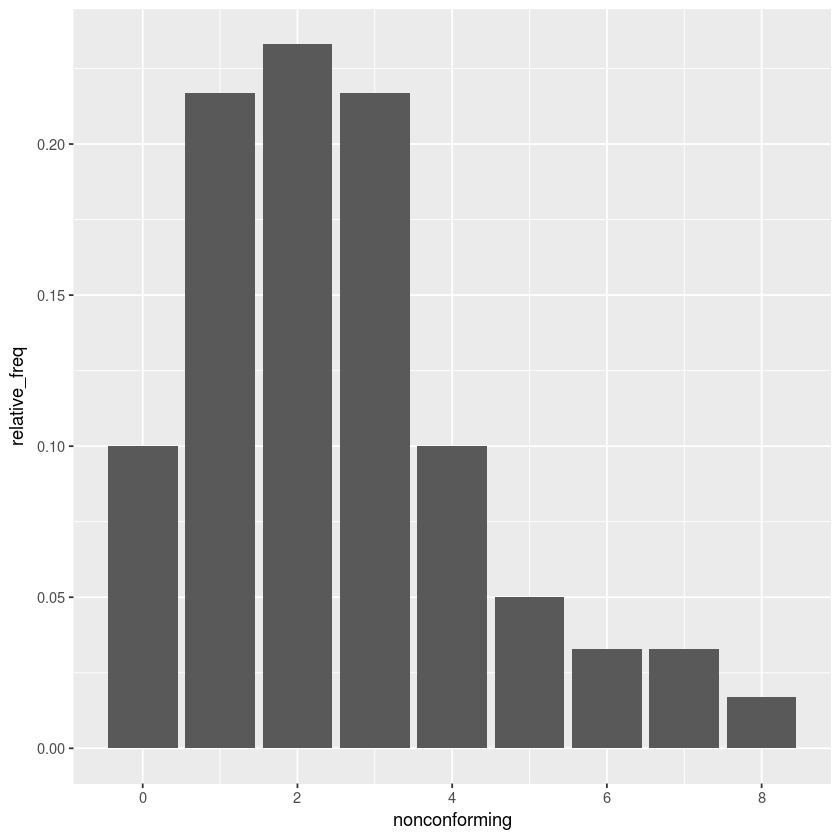

In [61]:
ggplot(freq, aes(y = relative_freq,x = nonconforming)) +
  geom_col()

Comment on its features. (Select all that apply.)

In [62]:
mean(nonconforming)
median(nonconforming)

[1] 2.55

[1] 2

There is some positive skewness in the data.

The center of the histogram is around 2 or 3.

## Problem 17
The minimum injection pressure (psi) for injection molding specimens of high amylose corn was determined for eight different specimens (higher pressure corresponds to greater processing difficulty), resulting in the following observations. 

In [63]:
injection_pressure <- c(15.0,12.9,17.9,14.3,12.4,10.5,9.4,8.4)

(a) Determine the values of the sample mean x, sample median x tilde, and 12.5% trimmed mean xtr. (Round your answers to two decimal places.)

$\bar{x}=12.6$

$\tilde{x}=12.65$

$\bar{x}_{tr}=12.42$

In [69]:
mean(injection_pressure)
median(injection_pressure)
round(mean(injection_pressure,trim = 0.125),2)

[1] 12.6

[1] 12.65

[1] 12.42

Compare these values. 
All three measures of center are similar, indicating little skewness to the data set.

All three measures of center are similar, indicating little skewness to the data set.

(b) By how much could the smallest sample observation, currently 8.4, be increased without affecting the value of the sample median?

4 is correct

In [72]:
half_length <- length(injection_pressure)/2 
injection_pressure <- sort(injection_pressure)
values_for_median <- c(injection_pressure[half_length],injection_pressure[half_length+1])
min(values_for_median)-min(injection_pressure)

[1] 4

(c) Suppose we want the values of the sample mean and median when the observations are expressed in kilograms per square inch (ksi) rather than psi. Is it necessary to reexpress each observation in ksi, or can the values calculated in part (a) be used directly? [Hint: 1 kg = 2.2 lb.]

No, the values obtained in part (a) can be used directly.  

In [74]:
mean(injection_pressure)/1000
median(injection_pressure)/1000
round(mean(injection_pressure,trim = 0.125)/1000,2)

[1] 0.0126

[1] 0.01265

[1] 0.01

## Problem 18
An article reported the following data on oxygen consumption (mL/kg/min) for a sample of ten firefighters performing a fire-suppression simulation: 

In [76]:
oxygen_consumption <- c(29.7,49.7,30.8,28.6,28.7,25.3,33.7,29.7,23.2,31.2)

Compute the following. (Round your answers to four decimal places.)

(a) The sample range

26.5
is correct

In [78]:
max(oxygen_consumption)-min(oxygen_consumption)

[1] 26.5

(b) The sample variance s2 from the definition (i.e., by first computing deviations, then squaring them, etc.)

51.643 is correct

In [85]:
deviations <- oxygen_consumption-mean(oxygen_consumption)
squared_deviations <- deviations^2
var_oxygen_consumption <- round(sum(squared_deviations)/(length(oxygen_consumption)-1),4)
var_oxygen_consumption

[1] 51.6427

(c) The sample standard deviation

7.1863 is correct

In [87]:
round(sqrt(var_oxygen_consumption),4)

[1] 7.1863

(d) s2 using the shortcut method

51.6427 is correct

In [91]:
n=length(oxygen_consumption)
sum_of_squares <- sum(oxygen_consumption^2)
squared_sum  <- sum(oxygen_consumption)^2
S_xx <- sum_of_squares - (squared_sum/n)
round(S_xx/(n-1),4)

[1] 51.6427

## Problem 19
An article on pedaling techniques for elite endurance cyclists reported on single-leg power at a high workload. 

In [93]:
leg_power <- c(249,193,163,186,182,171,177
  ,207,207,186,205,185,190,201)

(a) Calculate the sample mean x and median x tilde. (Round your mean to two decimal places.) 

193
and
188
is correct

In [95]:
mean(leg_power)
median(leg_power)
sd(leg_power)

[1] 193

[1] 188

[1] 20.88061

Interpret the sample mean and median. 

The mean is larger than the median, but they are still fairly close together.

(b) Suppose that the first observation had been 260 rather than 249. Calculate the sample mean and median. (Round your mean to two decimal places.) 

193.79
and
188
is correct

In [106]:
alt_leg_power <- leg_power
alt_leg_power[1] <- 260
round(mean(alt_leg_power),2)
median(alt_leg_power)

[1] 193.79

[1] 188

How would the mean and median change? 

The mean increased, and the median stayed the same.

(c) Calculate a trimmed mean by eliminating the smallest and largest sample observations. (Enter your answer to two decimal places.)

190.83 is correct

In [108]:
round(mean(leg_power,trim = (1/length(leg_power))),2)

[1] 190.83

What is the corresponding trimming percentage? (Round your answer to two decimal places.)

7.14% is correct

In [112]:
round(100*(1/length(leg_power)),2)

[1] 7.14


(d) The article also reported values of single-leg power for a low workload. The sample mean for n = 13 observations was x = 119.8 (actually 119.7692), and the 14th observation, somewhat of an outlier, was 157. What is the value of x for the entire sample? (Round your answer to the nearest whole number.)

122 is correct

In [128]:
n <- 13
x <- 119.7692
o <- 157
sum <- n*x
round((sum+o)/(n+1),0)

[1] 122

## Problem 20
Consider the following observations on shear strength (MPa) of a joint bonded in a particular manner. 

In [131]:
shear_strength <- c(  22.8,40.4,16.4,73.6,36.6,109.6
  ,30.0,4.4,33.1,66.7,81.5)

(a) What are the values of the fourths? (Enter your answers to two decimal places.) 

26.4
and
70.15
is correct

In [134]:
Q1 <- quantile(shear_strength, 0.25)
Q3 <- quantile(shear_strength, 0.75)
Q1
Q3

25% 
26.4

75% 
70.15

What is the value of fs?

43.75 is correct

In [138]:
as.numeric(Q3-Q1)

[1] 43.75

(b) Construct a boxplot based on the five-number summary. 

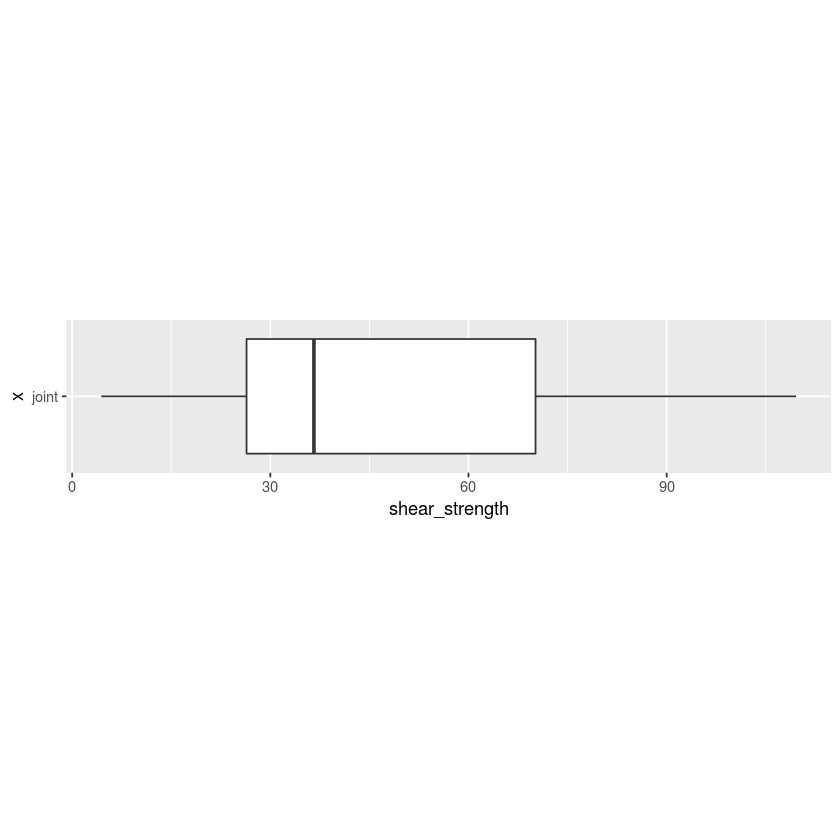

In [172]:
ggplot(as.data.frame(shear_strength),aes(x='joint',y=shear_strength)) +
geom_boxplot() +
theme(aspect.ratio = 0.2)+
coord_flip()

Comment on its features. (Select all that apply.)

The variation seems quite large.

There is a slight positive skew to the data.

There are no outliers.

(c) How large or small does an observation have to be to qualify as an outlier? (Round your answers to one decimal place.) 

below -39.2
and
above 135.8


In [195]:
round(as.numeric(Q1-1.5*(Q3-Q1)),1)
round(as.numeric(Q3+1.5*(Q3-Q1)),1)

[1] -39.2

[1] 135.8

How large or small does an observation have to be to qualify as an extreme outlier? (Round your answers to one decimal place.) 

below -104.9
and
above 201.4


In [197]:
round(as.numeric(Q1-3*(Q3-Q1)),1)
round(as.numeric(Q3+3*(Q3-Q1)),1)

[1] -104.9

[1] 201.4

(d) By how much could the largest observation be decreased without affecting fs?

36 is correct

In [198]:
shear_strength  <- sort(shear_strength)
three_fourths_length <- floor(3*length(shear_strength)/4)
values_for_Q3 <- c(shear_strength[three_fourths_length],shear_strength[three_fourths_length+1]) 
max(shear_strength)-max(values_for_Q3)

[1] 36